In [1]:
import pandas as pd
import numpy as np

In [59]:
%matplotlib inline

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')

In [3]:
from os.path import join

from glob import glob

import plotly.express as px

In [4]:
import geopandas as gpd

In [258]:
from shapely.geometry import Point, Polygon

In [5]:
PATH = '/Users/rdora/crime/'
DATA = '/Users/rdora/crime/data/'

In [6]:
_names = ['year',
         'date',
         'lat',
         'lon',
         'news',
         'cassualties',
         'url']

In [7]:
df_map = pd.read_excel(join(DATA, 'mapa_del_crimen.xlsx'), sheet_name=0,
                      names=_names)

In [8]:
files = glob(join(DATA, 'Mapa*Corregido*'))

In [137]:
meses = ['Enero',
        'Febrero',
        'Marzo',
        'Abril',
        'Mayo',
        'Junio',
        'Julio',
        'Agosto',
        'Septiembre',
        'Octubre',
        'Noviembre',
        'Diciembre']
meses_num = [str(i + 1) for i in range(12)]
replace = dict(zip(meses, meses_num))

In [143]:
import locale
locale.setlocale(locale.LC_ALL,'es_ES.UTF-8')

'es_ES.UTF-8'

In [144]:
temp['date']

0        12 de Octubre
1         2 de Octubre
2         1 de Octubre
3     24 de Septiembre
4     24 de Septiembre
5     23 de Septiembre
6     18 de Septiembre
7      5 de Septiembre
8      5 de Septiembre
9      7 de Septiembre
10    29 de Septiembre
11     4 de Septiembre
12     4 de Septiembre
13     9 de Septiembre
14        14 de Agosto
15        28 de Agosto
16        25 de Agosto
17        24 de Agosto
18        21 de Agosto
19        21 de Agosto
20        15 de Agosto
21        14 de Agosto
22        10 de Agosto
23         5 de Agosto
24        14 de Agosto
25        26 de Agosto
26        14 de Agosto
27         4 de Agosto
28        21 de Agosto
29         28 de Julio
            ...       
68         22 de Marzo
69         14 de Marzo
70         22 de Marzo
71         14 de Marzo
72          7 de Marzo
73       23 de Febrero
74       23 de Febrero
75       21 de Febrero
76       21 de Febrero
77       20 de Febrero
78        2 de Febrero
79        5 de Febrero
80       23

In [142]:
replace

{'Enero': '1',
 'Febrero': '2',
 'Marzo': '3',
 'Abril': '4',
 'Mayo': '5',
 'Junio': '6',
 'Julio': '7',
 'Agosto': '8',
 'Septiembre': '9',
 'Octubre': '10',
 'Noviembre': '11',
 'Diciembre': '12'}

In [161]:
def replace_date(x):
    date = x.split()
    day = date[0]
    month = date[2]
    year = date[3]
    
    return '{}-{}-{}'.format(day, replace[month], year)

In [184]:
dfs[5].head()

,year,date,lat,lon,news,cassualties,url
0,2015,12-10-2015,25.617672,-100.259318,Persiguen y ejecutan a hombre,1,http://www.elnorte.com/aplicaciones/articulo/...
1,2015,2-10-2015,25.632075,-100.286088,Ejecutan a uno en plaza en Garza Sada,1,http://www.elnorte.com/aplicaciones/articulo/...
2,2015,1-10-2015,25.675784,-100.475788,Lo ejecutan frente a su casa,1,http://www.elnorte.com/aplicaciones/articulo/...
3,2015,24-9-2015,25.657586,-100.322029,Lo esperan para ejecutarlo,1,http://www.elnorte.com/aplicaciones/articulo/...
4,2015,24-9-2015,25.683207,-100.305650,Matan a 2 clientes en ataque 13 a bar,2,http://www.elnorte.com/aplicaciones/articulo/...


In [188]:
dfs = [df_map]
for f in files:
    temp = pd.read_csv(f, encoding='latin',
                      names=_names, skiprows=1)
    temp = temp.dropna()
    temp['year'] = temp['year'].astype(str)
    temp['date'] = temp.date + ' ' + temp.year
    temp['date'] = temp['date'].apply(replace_date)
    temp['date'] = pd.to_datetime(temp['date'])
    temp = temp.replace(replace)
    dfs.append(temp)
    
df = pd.concat(dfs, axis=0)
df = df.dropna()
df = df[df.lon != 'Longitud']
df['lat'] = df['lat'].astype(float)
df['lon'] = df['lon'].astype(float)
df['cassualties'] = df['cassualties'].astype(float)

df = df[df.lat.between(25.3, 26) & df.lon.between(-101, -99.75)]
df = df.drop_duplicates(subset='news')
df = df[df['cassualties'] > 0]

# Map Data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2264 entries, 0 to 98
Data columns (total 7 columns):
year           2264 non-null object
date           2264 non-null object
lat            2264 non-null float64
lon            2264 non-null float64
news           2264 non-null object
cassualties    2264 non-null float64
url            2264 non-null object
dtypes: float64(3), object(4)
memory usage: 141.5+ KB


In [14]:
df.describe()

,lat,lon,cassualties
count,2264.000000,2264.000000,2264.000000
mean,25.708690,-100.283995,1.379417
std,0.074128,0.114670,1.742236
min,25.506503,-100.810547,0.000000
25%,25.659734,-100.343167,1.000000
50%,25.694334,-100.295772,1.000000
75%,25.753955,-100.215490,1.000000
max,25.989565,-100.000305,44.000000


In [123]:
px.scatter_mapbox?

In [115]:
px.colors.cyclical.IceFire?

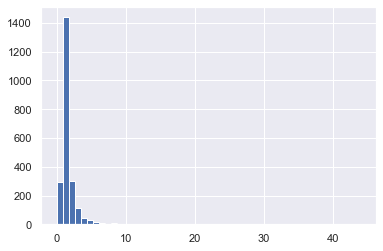

In [15]:
df['cassualties'].hist(bins=50)

In [80]:
px.set_mapbox_access_token(open(".token").read())

fig = px.scatter_mapbox(df, lat="lat", lon="lon", text='cassualties',
                        color='cassualties',
                        size_max=15, zoom=9, range_color = (1, 2),
                       color_continuous_scale=px.colors.diverging.Armyrose)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [86]:
df.head()

,year,date,lat,lon,news,cassualties,url
0,2015,2015-10-12 00:00:00,25.617672,-100.259318,Persiguen y ejecutan a hombre,1,http://www.elnorte.com/aplicaciones/articulo/d...
1,2015,2015-10-02 00:00:00,25.632075,-100.286088,Ejecutan a uno en plaza en Garza Sada,1,http://www.elnorte.com/aplicaciones/articulo/d...
2,2015,2015-10-01 00:00:00,25.675784,-100.475788,Lo ejecutan frente a su casa,1,http://www.elnorte.com/aplicaciones/articulo/d...
3,2015,2015-09-24 00:00:00,25.657586,-100.322029,Lo esperan para ejecutarlo,1,http://www.elnorte.com/aplicaciones/articulo/d...
4,2015,2015-09-24 00:00:00,25.683207,-100.305650,Matan a 2 clientes en ataque 13 a bar,2,http://www.elnorte.com/aplicaciones/articulo/d...


In [27]:
municipios = ['MONTERREY',
             'GUADALUPE',
             'SAN NICOLÁS DE LOS GARZA',
             'APODACA',
             'SAN PEDRO GARZA GARCÍA',
             'SANTA CATARINA',
             'GENERAL ESCOBEDO',
             'JUÁREZ',
             'SANTIAGO',
             'CADEREYTA JIMÉNEZ',
             'GARCÍA',
             'SALINAS VICTORIA']

In [60]:
map_df.MUN_NAME.value_counts()

MONTERREY                   627
GUADALUPE                   448
SAN NICOLÁS DE LOS GARZA    335
APODACA                     296
SAN PEDRO GARZA GARCÍA      270
SANTA CATARINA              204
GENERAL ESCOBEDO            179
JUÁREZ                      100
SANTIAGO                     85
CADEREYTA JIMÉNEZ            47
GARCÍA                       29
SALINAS VICTORIA             11
Name: MUN_NAME, dtype: int64

In [194]:
df.head()

,year,date,lat,lon,news,cassualties,url
0,2015,2015-10-12,25.617672,-100.259318,Persiguen y ejecutan a hombre,1.0,http://www.elnorte.com/aplicaciones/articulo/d...
1,2015,2015-10-02,25.632075,-100.286088,Ejecutan a uno en plaza en Garza Sada,1.0,http://www.elnorte.com/aplicaciones/articulo/d...
2,2015,2015-10-01,25.675784,-100.475788,Lo ejecutan frente a su casa,1.0,http://www.elnorte.com/aplicaciones/articulo/d...
3,2015,2015-09-24,25.657586,-100.322029,Lo esperan para ejecutarlo,1.0,http://www.elnorte.com/aplicaciones/articulo/d...
4,2015,2015-09-24,25.683207,-100.305650,Matan a 2 clientes en ataque 13 a bar,2.0,http://www.elnorte.com/aplicaciones/articulo/d...


In [204]:
len(df.date.astype(int).unique())

1174

In [83]:
df.plot.scatter?

In [214]:
plt.get_cmap('autumn')

In [229]:
fig.colorbar?

In [232]:
df.plot.scatter?

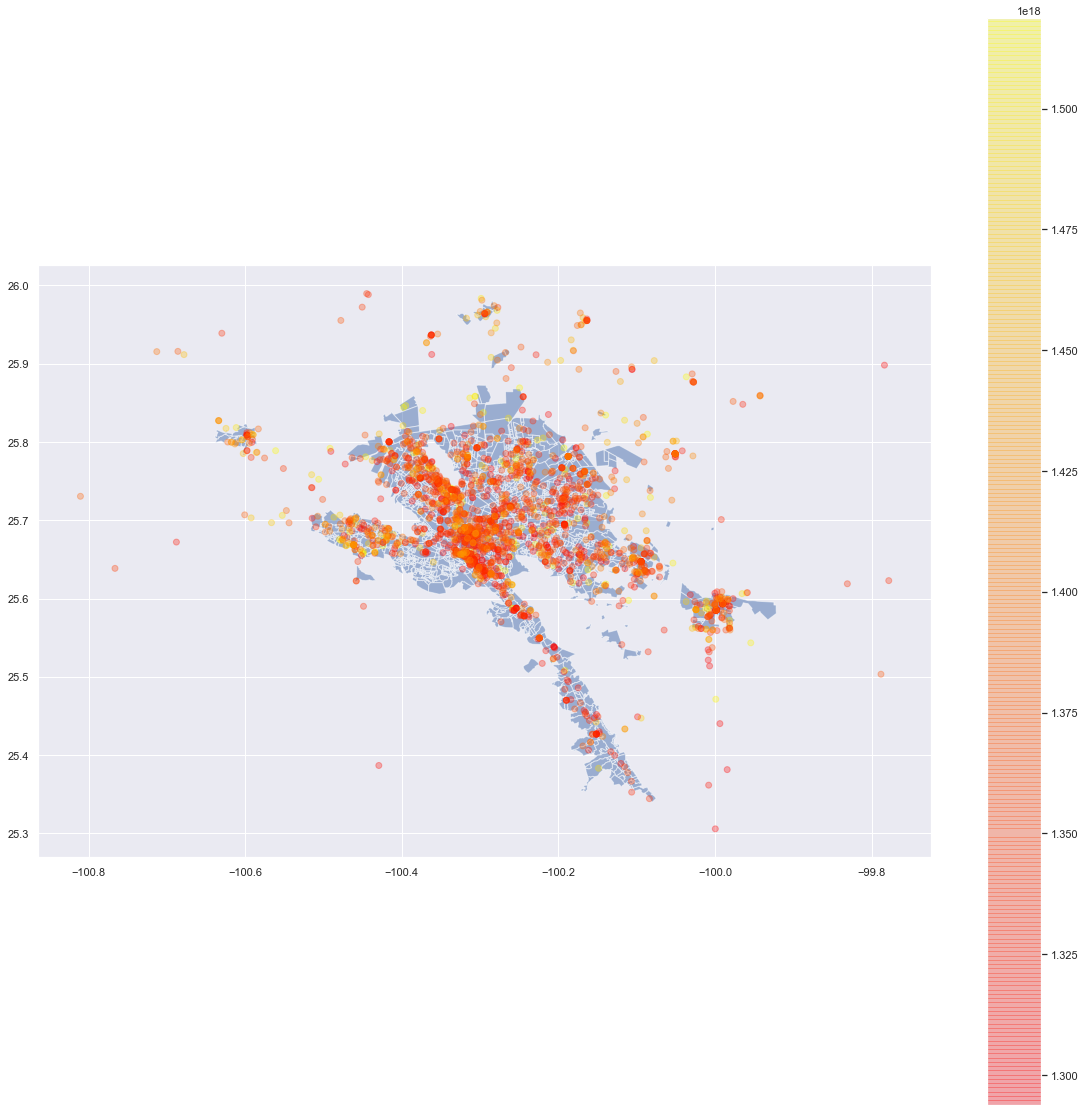

In [255]:
map_df.columns

fp = join(PATH, 'shpfiles', 'nuevo_leon.shp')

map_df = gpd.read_file(fp, encoding='utf-8')
map_df = map_df[map_df['MUN_NAME'].isin(municipios)]

fig, ax = plt.subplots(figsize=(20, 20))


colors = df.date.astype(int).values

# scatter = df.plot.scatter(x='lon', y='lat', ax=ax, c='date', alpha=0.4,
               # cmap='autumn', zorder=10)

map_df.plot(ax=ax, alpha=0.5)

scatter = ax.scatter(df.lon.values, df.lat.values,
                    c=df.date.values, alpha=0.3,
                    cmap='autumn')
cb = fig.colorbar(scatter, orientation='vertical')

## Hotspot Areas

In [275]:
neighborhoods = []
for i, row in df.iterrows():
    p = Point(row['lon'], row['lat'])
    for j, row_j in map_df.iterrows():
        polygon = row_j['geometry']
        if p.within(polygon):
            neighborhoods.append(row_j['SETT_NAME'])
            break
    else:
        neighborhoods.append(np.nan)

In [281]:
df['neighborhood'] = neighborhoods
df.to_csv(join(DATA, 'crime.csv'), index=False)

In [315]:
df.head()

,year,date,lat,lon,news,cassualties,url,neighborhood
0,2015,2015-10-12,25.617672,-100.259318,Persiguen y ejecutan a hombre,1.0,http://www.elnorte.com/aplicaciones/articulo/d...,EJIDAL LOS REMATES
1,2015,2015-10-02,25.632075,-100.286088,Ejecutan a uno en plaza en Garza Sada,1.0,http://www.elnorte.com/aplicaciones/articulo/d...,REVOLUCION PROLETARIA
2,2015,2015-10-01,25.675784,-100.475788,Lo ejecutan frente a su casa,1.0,http://www.elnorte.com/aplicaciones/articulo/d...,HDA SANTA CATARINA (FOMERREY 29)
3,2015,2015-09-24,25.657586,-100.322029,Lo esperan para ejecutarlo,1.0,http://www.elnorte.com/aplicaciones/articulo/d...,INDEPENDENCIA
4,2015,2015-09-24,25.683207,-100.305650,Matan a 2 clientes en ataque 13 a bar,2.0,http://www.elnorte.com/aplicaciones/articulo/d...,CENTRO DE MONTERREY


In [372]:
df.date.min()

Timestamp('2011-01-01 00:00:00')

In [373]:
df.date.max()

Timestamp('2018-02-17 00:00:00')

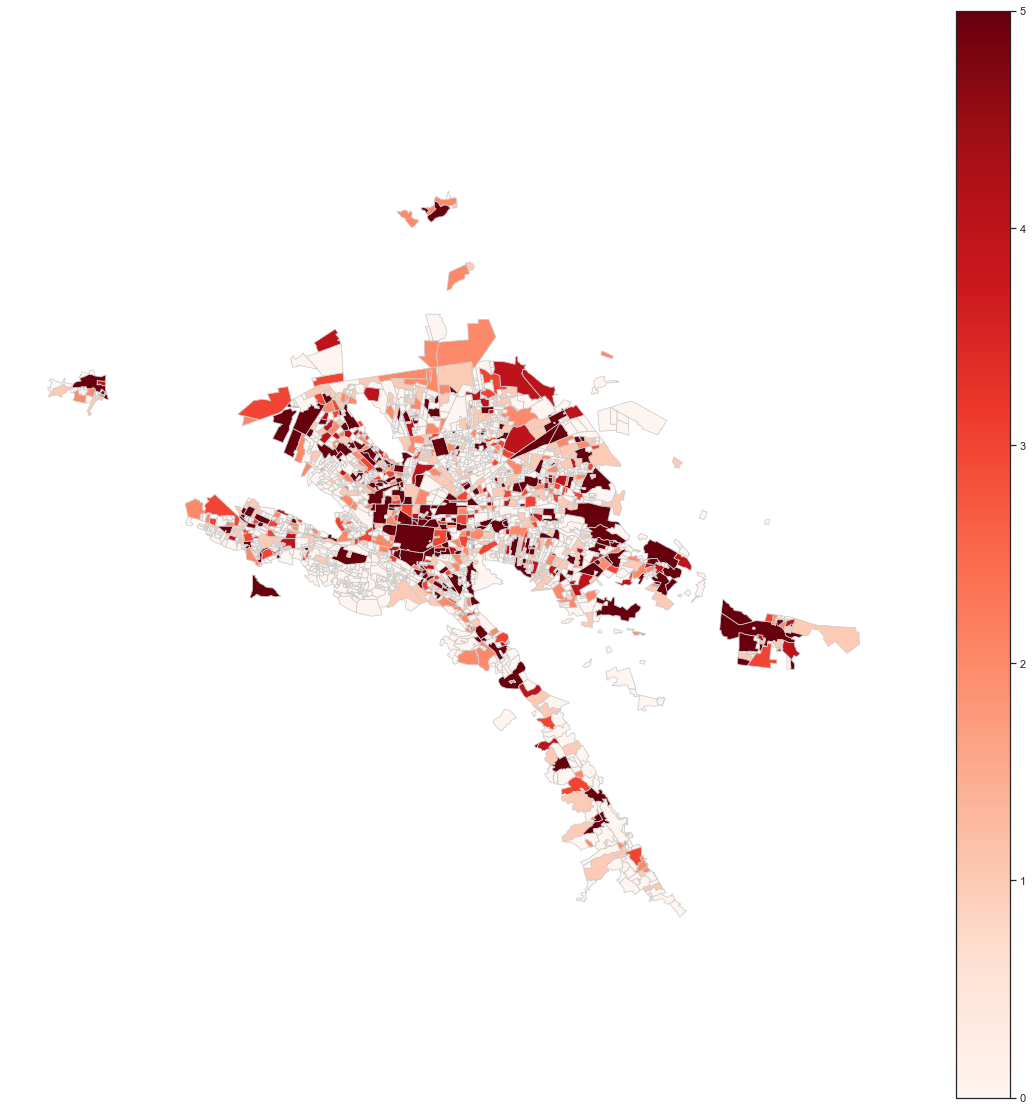

In [369]:
df_agg = df.groupby('neighborhood').sum()[['cassualties']]

df_merge = map_df.set_index('SETT_NAME').join(df_agg)
df_merge = df_merge.fillna(0)

variable = 'cassualties'
fig, ax = plt.subplots(figsize=(20, 20))
vmin, vmax = 0, 5
df_merge.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8',
             vmin=vmin, vmax=vmax, legend=True);
ax.axis('off');
fig.savefig('../figures/fig_1.pdf', format='pdf')

In [359]:
df['year'] = df.year.astype(str)

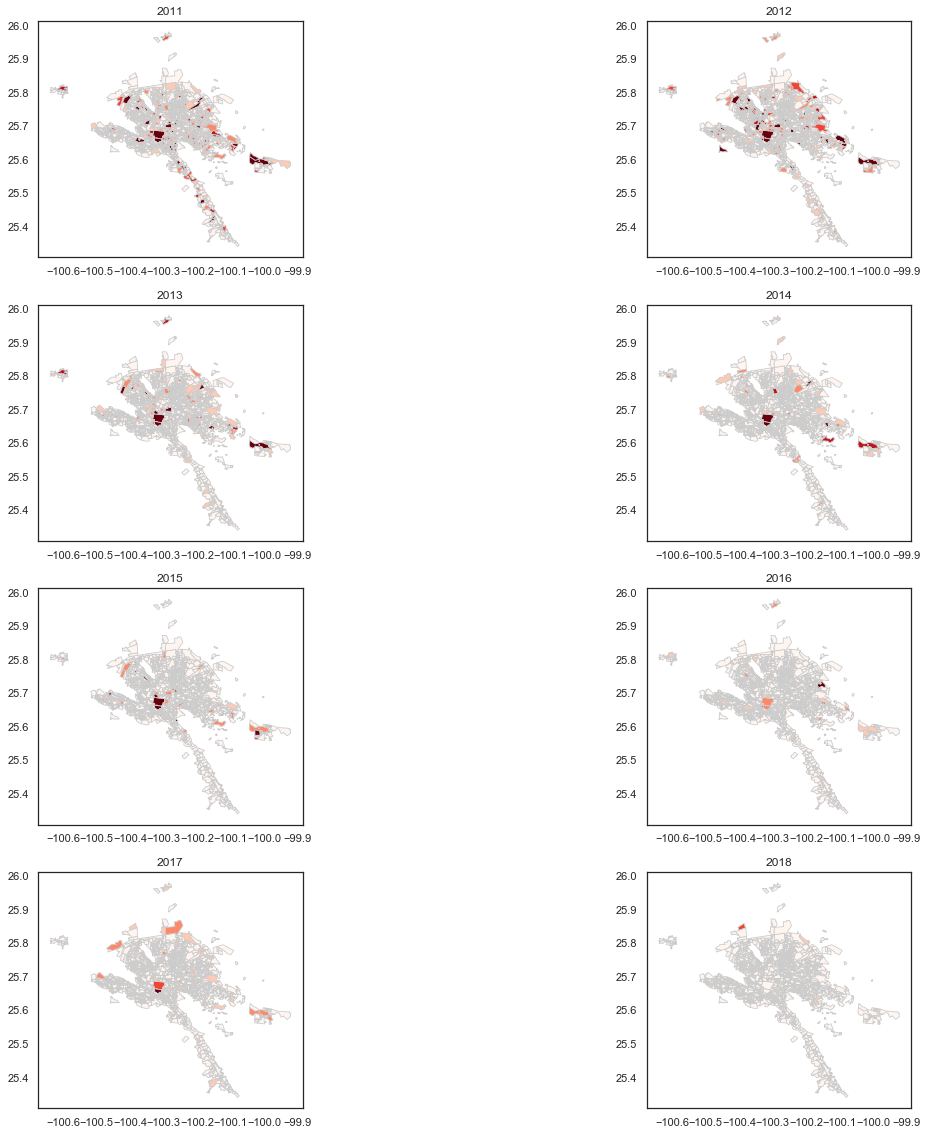

In [361]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
x = -1
for i, year in sorted(enumerate(sorted(df.year.astype(int).unique()))):
    if i % 2 == 0:
        x += 1
    j = i % 2
    df_sub = df[df.year == str(year)]
    df_agg = df_sub.groupby('neighborhood').sum()[['cassualties']]

    df_merge = map_df.set_index('SETT_NAME').join(df_agg)
    df_merge = df_merge.fillna(0)

    variable = 'cassualties'
    vmin, vmax = 0, 5
    df_merge.plot(column=variable, cmap='Reds', linewidth=0.8, ax=axs[x][j], edgecolor='0.8',
                 vmin=vmin, vmax=vmax)
    axs[x][j].set_title(year)

## BBox

A BBox is a delimited area defined by 2 points on the map.

Our BBox = $(25.506503, -100.810547, 25.989565, -100.000305)$

In [158]:
df.describe()

,lat,lon,cassualties
count,2264.000000,2264.000000,2264.000000
mean,25.708690,-100.283995,1.379417
std,0.074128,0.114670,1.742236
min,25.506503,-100.810547,0.000000
25%,25.659734,-100.343167,1.000000
50%,25.694334,-100.295772,1.000000
75%,25.753955,-100.215490,1.000000
max,25.989565,-100.000305,44.000000
